# Introduction to PyTorch


## PyTorch



PyTorch is one of the most popular deep learning frameworks today. "Popular" in the sense that nowadays most code related to neural networks is written in PyTorch. What made this framework so popular is that PyTorch is very convenient to work with. As we will see later, working with PyTorch is very similar to working with Numpy. PyTorch also has very convenient and informative [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).


A brief overview of deep learning frameworks:

- **Caffe, Theano, Lasagne** — are practically no longer used;
- **TensorFlow** — a framework from Google that was popular until 2017-2018 before PyTorch appeared. At that time, most code related to neural networks was written with it. However, it was quite complex, so PyTorch quickly took the lead.

    TensorFlow also has a "wrapper" called Keras, which allows for simpler work with neural networks. However, Keras is less flexible than PyTorch, so it cannot fully replace it.

    Also in 2019, TensorFlow 2.0 was released, in which working with neural networks was greatly simplified. But by that time, PyTorch had already captured the market, so TensorFlow 2.0 never became popular.

- **PyTorch**;
- **JAX** — a new framework from Google designed to replace TensorFlow.


### torch.Tensor

The basic unit of the framework is a structure called `torch.Tensor`. Tensor is analogous to `numpy.array`, many methods for working with `torch.Tensor` exactly repeat the methods of `numpy array`.

A tensor is the data type that all neural networks in PyTorch work with. The weight matrices of network layers are tensors. The data that we feed to the network input must also be converted to the `torch.Tensor` type. And the network output, of course, will also have the `torch.Tensor` type.

Let's import the library and consider typical ways of creating tensors.


In [1]:
import torch

1. Tensors can be created from lists, arrays, and other Python containers.


In [2]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

2. Tensors can be created using initialization functions, as in `numpy`.


In [3]:
# tensor of zeros of given size
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
# tensor of ones of given size
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
# tensor — identity matrix of given size
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

3. In general, almost all methods that Numpy arrays have are also available for torch.Tensor. Operations can also be performed with tensors:


In [6]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [7]:
x_tensor + y_tensor

tensor([[-9,  5],
        [ 8,  0]])

In [8]:
# matrix multiplication
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [9]:
# alternative np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

4. Tensors can be converted back to Numpy format or Python values


In [10]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [11]:
# multidimensional tensor
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

[[1, 2], [3, 4]]

In [12]:
# one-dimensional tensor
x_tensor = torch.tensor([3])

x_tensor.item()

3

## Neural Network in PyTorch

Let's learn how to create a fully-connected neural network in PyTorch.

Neural networks in PyTorch are created like a constructor: there is a set of standard blocks from which we can assemble the final model. The simplest of these blocks are linear layers and activation functions.


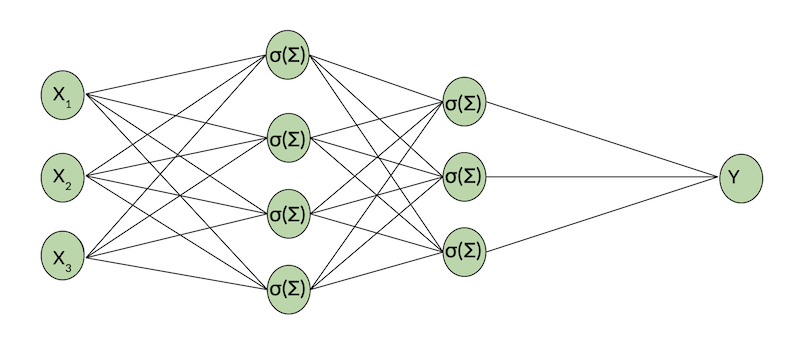

A layer representing a linear transformation is defined using the `torch.nn.Linear` class. Let's create a layer with 5 input and 3 output neurons.


In [14]:
# module that defines all network layer classes and activation functions
import torch.nn as nn

n = 5
m = 3
# the bias argument (True/False) determines whether bias is applied in the layer
# If bias=False, the bias vector is zero
linear_layer = nn.Linear(n, m, bias=True)

In [15]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

Next — the activation function. Many well-known activation functions are implemented in the `nn` module and duplicated in the `nn.functional` module. Let's choose one of them, for example, hyperbolic tangent (tanh).


In [16]:
# You can also use:

# import torch.nn.functional as F
# activation = F.tanh

# or this variant:
activation = nn.Tanh()

In [17]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

Now the passage of some tensor with data through such a fully-connected layer will be defined using a sequence of commands:


In [18]:
random_input = torch.rand(5)
random_input

x = linear_layer(random_input)
output = activation(x)
output

tensor([0.7217, 0.3697, 0.4231], grad_fn=<TanhBackward0>)

The `Linear` layer has parameters - weights and biases, these parameters are also tensors, but they are special: model parameters that we train for some specific task. Let's access them:


To create a neural network, we need to combine its layers into some unified structure.

For this, in PyTorch a model class is defined by inheriting the `torch.nn.Module` class (when inheriting we call the parent class constructor — `super().__init__()`).

In this class, we need to override the `__init__()` methods (class constructor, where we will define layers and other network elements we need) and `forward()` (method that determines what happens to the tensor during forward pass - that is, what function our network will implement).


First, let's generate the data (you can skip this part and just run it).

The data is contained in the variables X_train, y_train, X_test, y_test. X represents the coordinates of a point (i.e., a vector of size 2), y is the class of the point (0 or 1).


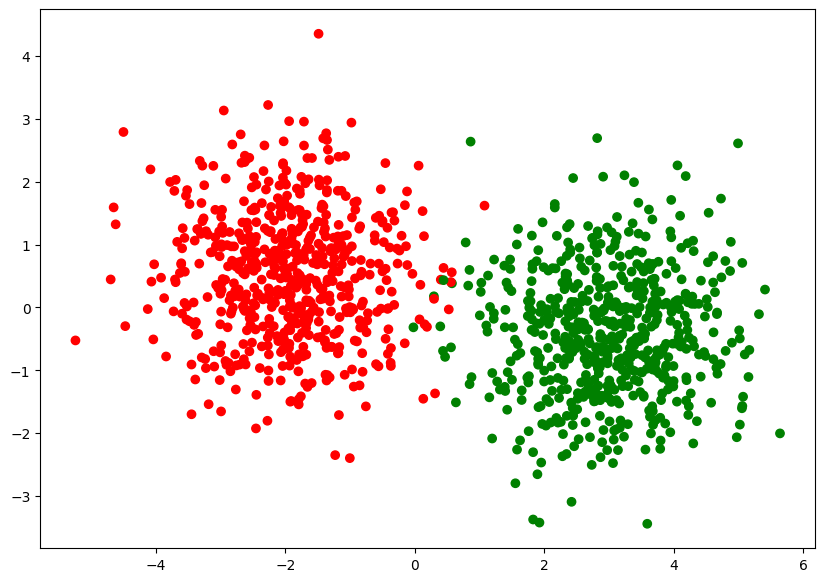

In [19]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# generate 1200 points distributed around two centers: (-2,0.5) and (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# plot the points on the plane, coloring them in two colors depending on the class
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [21]:
X_train

array([[ 2.99392909,  0.33849077],
       [ 3.65590078, -0.30526381],
       [ 3.67937328, -1.64879404],
       ...,
       [-0.42078718,  1.26743473],
       [ 3.2005692 ,  0.64863735],
       [-1.40259993,  1.20117274]])

In [22]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

For example, for a simple two-layer network with sigmoid nonlinearity on both layers, the `__init__()` method will look like this:


Thus, a neural network in PyTorch is defined by writing a class:
And the `forward()` method will look like this:

You can look at the model architecture using `print()`:


In [24]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # can be replaced with nn.Tanh / nn.ReLU / ..

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): # data input to the network
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

**Training the network**


In [27]:
model = Net()

Let's now train this neural network on some data. Let's take a simple classification problem as an example.


In [32]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

In [33]:
nn_prediction

[[0.5599362254142761],
 [0.5913264751434326],
 [0.5499019026756287],
 [0.5561919808387756],
 [0.5631980299949646],
 [0.5892906785011292],
 [0.5816235542297363],
 [0.584348201751709],
 [0.591989278793335],
 [0.5794593095779419],
 [0.5503841638565063],
 [0.5478578805923462],
 [0.5904600620269775],
 [0.5674210786819458],
 [0.5577448606491089],
 [0.5440942049026489],
 [0.550294816493988],
 [0.5738605856895447],
 [0.5711487531661987],
 [0.5871488451957703],
 [0.5527303814888],
 [0.5725913643836975],
 [0.5859787464141846],
 [0.5556631684303284],
 [0.5455807447433472],
 [0.5877628922462463],
 [0.5502217411994934],
 [0.5542564988136292],
 [0.5688683986663818],
 [0.5886728763580322],
 [0.5890411138534546],
 [0.5882114768028259],
 [0.5495302677154541],
 [0.570012629032135],
 [0.5523180365562439],
 [0.570417582988739],
 [0.555091142654419],
 [0.5807527303695679],
 [0.5821247696876526],
 [0.5556026697158813],
 [0.5627139210700989],
 [0.586663007736206],
 [0.5540120005607605],
 [0.5552566051483154]

First, let's generate the data (you can skip this part and just run it).

The data is contained in the variables X_train, y_train, X_test, y_test. X represents the coordinates of a point (i.e., a vector of size 2), y is the class of the point (0 or 1).


In [34]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [35]:
nn_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Now X_train, y_train, X_test, y_test are numpy arrays. Let's convert them to tensors:


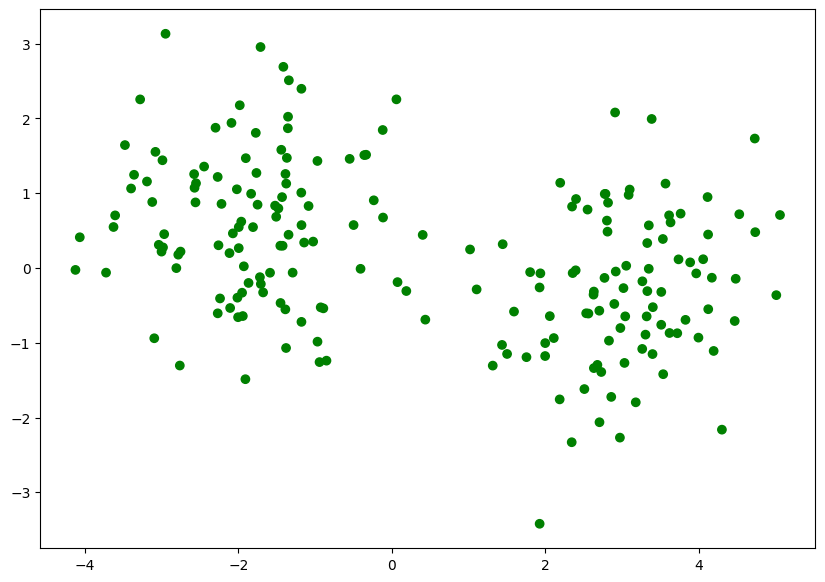

In [36]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Let's define the model. We'll use the same two-layer network with sigmoid activation that we defined above.

We'll also define the loss function. For binary classification, Binary Cross-Entropy (BCE) loss is well suited.


Now let's define the optimizer. We'll use Stochastic Gradient Descent (SGD).

The optimizer is what will update the model parameters. We specify which parameters to update (model.parameters()) and the learning step (learning rate, lr=0.5).

Great! Now we have all the components for training:
- **model** — the model (neural network)
- **loss_function** — loss function
- **optimizer** — optimizer

We can start the training loop. We will train as follows:
1. Zero the gradients (they accumulate by default, so we need to zero them)
2. Do forward pass (pass data through the network)
3. Calculate loss
4. Do backward pass (calculate gradients)
5. Update model parameters

Let's implement these 5 steps:


As you can see, the loss on training data decreases!

Now let's look at the loss on test data:


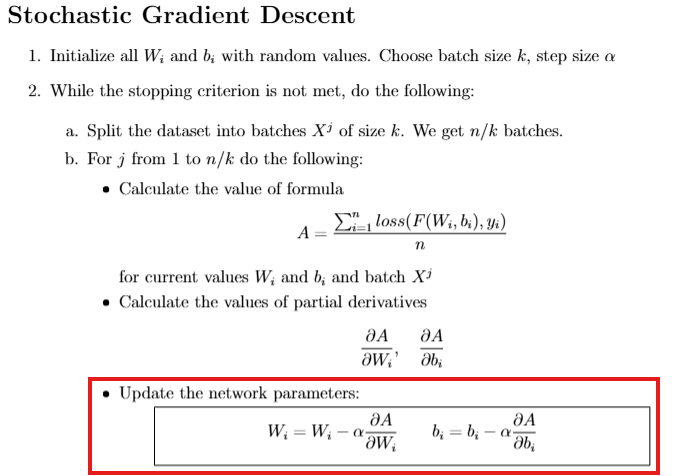

Loss on test data is also small. This means the model trained well!

Let's now look at the model's accuracy. To do this, we need to convert probabilities to classes (0 or 1).

The rule is simple: if probability >= 0.5, then class 1, otherwise class 0:


Great! 98.7% accuracy on the test set. Let's visualize the result:


In [55]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - the neural network model
        X and y - training data (features and labels)
        criterion - loss function from the `torch.nn` module
        optimizer - optimizer from the `torch.optim` module
        num_epoch - number of training epochs
    '''
    # loop over the number of training epochs
    for t in tqdm(range(num_epoch)):
        # Calculate our model's predictions
        y_pred = model(X)

        # Calculate the loss function value on the predictions
        loss = criterion(y_pred, y)

        # Compute the gradients
        loss.backward()
        # Perform gradient descent step
        optimizer.step()
        # Zero out the gradient values stored in the optimizer
        # before the next training step
        optimizer.zero_grad()

    return model

The model separated the classes very well!


In [38]:
model = Net()

## Automatic Differentiation (Autograd)


In [46]:
# loss function — binary cross-entropy (aka LogLoss)
criterion = torch.nn.BCELoss()
# optimizer — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [56]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

We know that neural network training occurs through gradient descent. That is, to train a network (more precisely, to find its parameters $\theta$), it is necessary to be able to calculate gradients of the loss function $Loss$ with respect to these parameters:


In [48]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

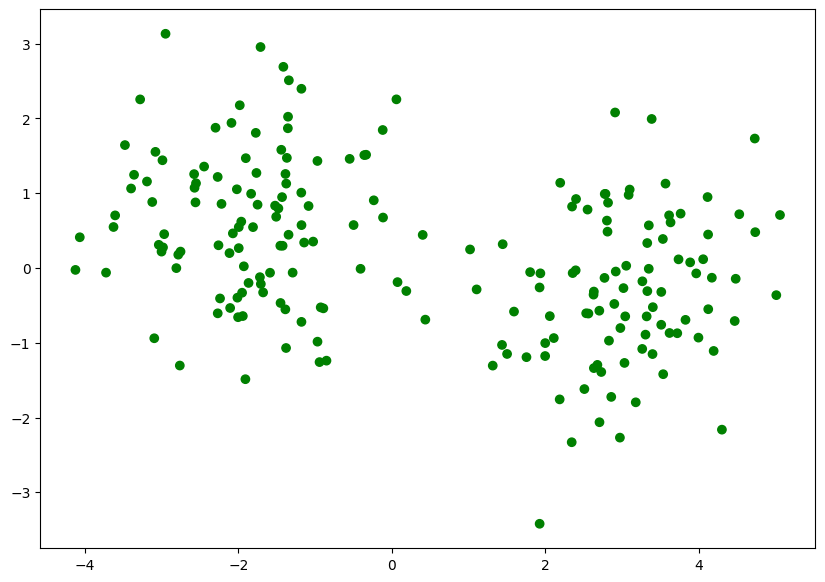

In [49]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

PyTorch allows you not to perform derivative calculations manually. It has an autograd mechanism for this.

The essence of autograd is that it builds a dynamic computation graph. On each iteration, the graph is built anew (dynamic), which is very convenient for debugging and using different network structures on different iterations.


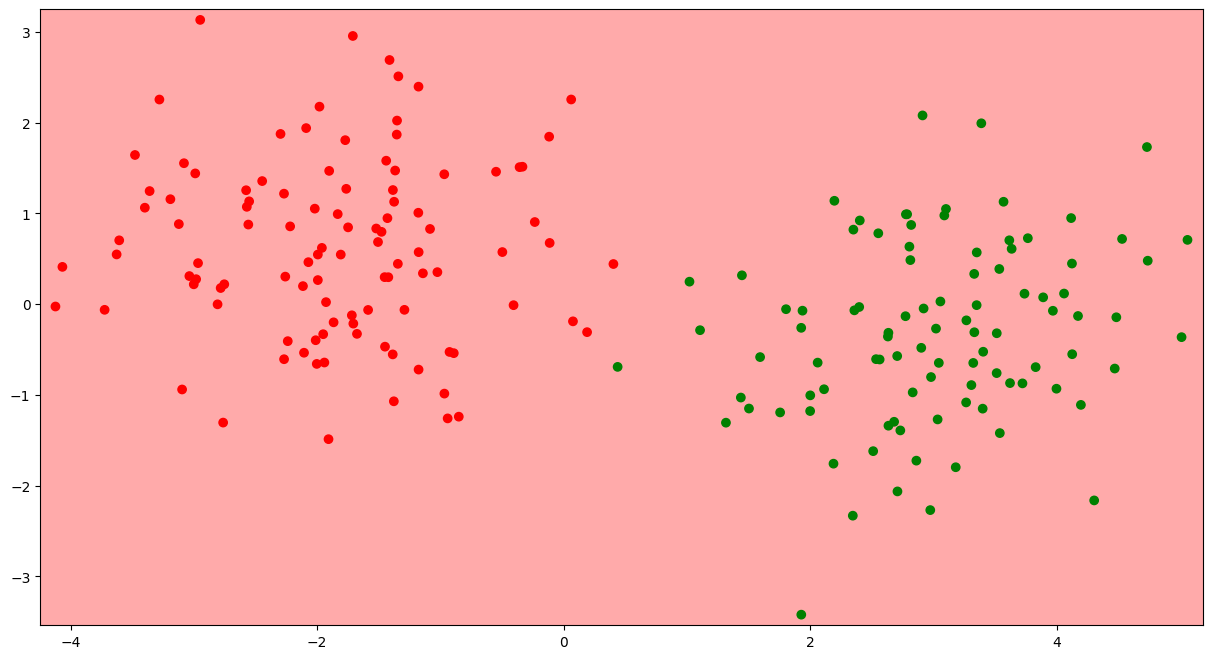

In [50]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

In order for PyTorch to start tracking operations with a tensor (that is, include it in the computation graph), it is necessary to set the argument requires_grad=True. By default, this argument is False in manually created tensors.


Let's consider a small example to make sure that our tensors are now in the computation graph and we can calculate derivatives using autograd:

We define a variable x, which is equal to 2:


In [60]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Then we calculate some function y, which depends on x:

Now we can calculate the derivative $\frac{dy}{dx}$ using the .backward() method:


To look at the value of the calculated derivative, we use the .grad attribute:


In [61]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - neural network model
        X and y - training dataset
        criterion - loss function from the `torch.nn` module
        optimizer - optimizer from the `torch.optim` module
        num_epoch - number of training epochs
    '''
    # loop over the number of training epochs
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # loop over dataloader batches
        for X_batch, y_batch in loader:
            # Calculate our model's predictions
            y_pred = model(X_batch)

            # Calculate the loss function value on the predictions
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Compute the gradients
            loss.backward()
            # Perform gradient descent step
            optimizer.step()
            # Zero out the gradient values stored in the optimizer
            # before the next training step
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

That is, the derivative is 16. Let's make sure this is the correct answer.


In [62]:
model = Net()

# loss function — binary cross-entropy (aka LogLoss)
criterion = torch.nn.BCELoss()
# optimizer — SGD (Stochastic Gradient Descent)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [63]:
model = train_stochastic(model, train_loader, criterion, optimizer, 30)

  0%|          | 0/30 [00:00<?, ?it/s]

curr_loss 0.6488674953579903
curr_loss 0.6481907404959202
curr_loss 0.6482631787657738
curr_loss 0.6462031938135624
curr_loss 0.645522702485323
curr_loss 0.6448407582938671
curr_loss 0.645989004522562
curr_loss 0.6448923945426941
curr_loss 0.6446168459951878
curr_loss 0.6425627805292606
curr_loss 0.6437499336898327
curr_loss 0.6407398581504822
curr_loss 0.6417435966432095
curr_loss 0.6412746235728264
curr_loss 0.6377507708966732
curr_loss 0.6380437351763248
curr_loss 0.6369783580303192
curr_loss 0.6372944451868534
curr_loss 0.6362680569291115
curr_loss 0.6351383589208126
curr_loss 0.6335818134248257
curr_loss 0.6350263468921185
curr_loss 0.6328799575567245
curr_loss 0.6337475515902042
curr_loss 0.6319668367505074
curr_loss 0.630030233412981
curr_loss 0.6296204328536987
curr_loss 0.6284990161657333
curr_loss 0.6286006905138493
curr_loss 0.6265982985496521


We had the function

The derivative is


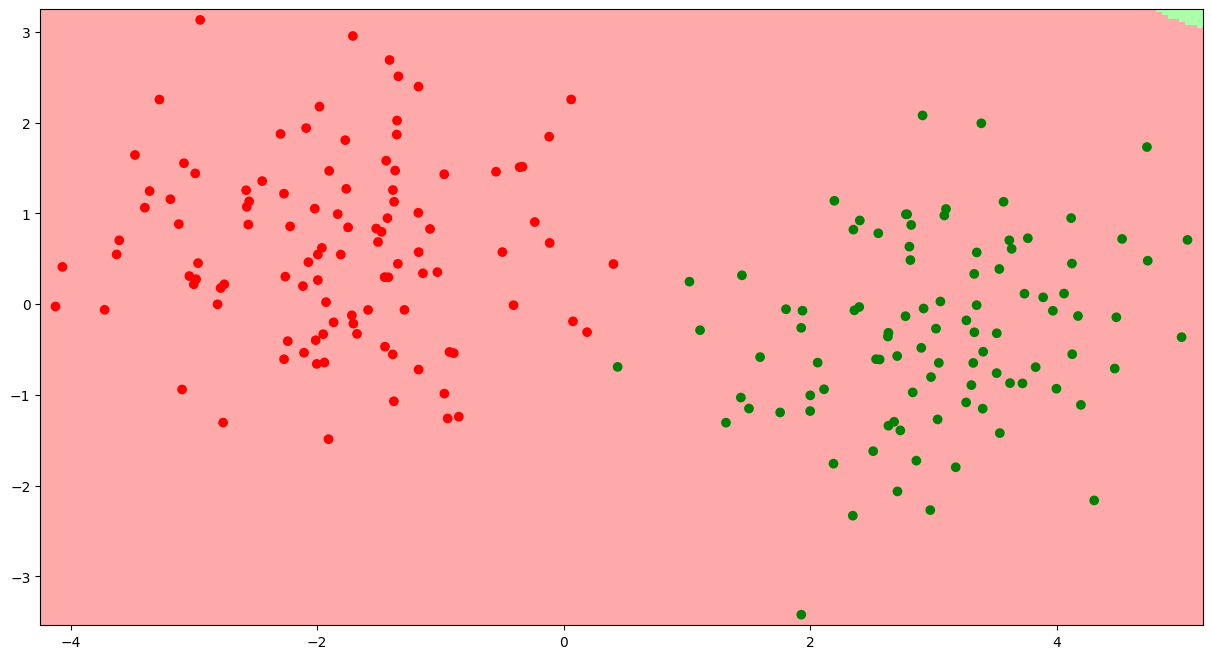

In [64]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

## nn.Sequential

At x=2, the derivative is $2(2^3) = 16$.


In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

All correct!


In [ ]:
model = nn.Sequential(
                   nn.Linear(2, 2, bias=True),
                   nn.Sigmoid(),
                   nn.Linear(2, 1, bias=True),
                   nn.Sigmoid()
                   )

- [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) (PyTorch docs)
- [Torch.autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) (PyTorch docs)

## Working with GPU

When training neural networks, especially large ones, using a GPU (Graphics Processing Unit) significantly speeds up computations. PyTorch makes it easy to move your model and data to GPU.

Let's see how to check if GPU is available and how to use it.

In [65]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Get GPU name if available
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")

Using device: cuda
GPU name: Tesla T4


Now let's move our model to GPU. We use the `.to(device)` method:

In [67]:
# Create model and move it to GPU
model = Net()
model = model.to(device)

print("Model is now on:", next(model.parameters()).device)

Model is now on: cuda:0


When training, we also need to move our data to the same device:

In [68]:
# Move data to GPU
X_train_gpu = torch.FloatTensor(X_train).to(device)
y_train_gpu = torch.FloatTensor(y_train).to(device)

print("Data is on:", X_train_gpu.device)

# Make prediction on GPU
with torch.no_grad():
    prediction = model(X_train_gpu[:5])  # predict first 5 samples
    print("Prediction shape:", prediction.shape)

Data is on: cuda:0
Prediction shape: torch.Size([5, 1])


**Important**: When using GPU, all tensors in the same operation must be on the same device. If you get an error like "Expected all tensors to be on the same device", check that your model, input data, and labels are all on GPU.

To move data back to CPU (for example, for plotting), use `.cpu()`:

In [69]:
# Move prediction back to CPU
prediction_cpu = prediction.cpu()
print("Now on CPU:", prediction_cpu.device)

# Convert to numpy (only works on CPU)
prediction_numpy = prediction_cpu.numpy()
print("As numpy array:", prediction_numpy[:3])

Now on CPU: cpu
As numpy array: [[0.52707833]
 [0.5199445 ]
 [0.51335186]]


## Embedding Layers for NLP

In Natural Language Processing, we work with words, not numbers. **Embedding layers** convert word indices into dense vectors of fixed size. This is essential for all NLP tasks.

Let's see how embeddings work:

In [70]:
import torch.nn as nn
# Example: we have a vocabulary of 1000 words
vocab_size = 1000
embedding_dim = 50  # each word will be represented by a 50-dimensional vector

# Create embedding layer
embedding = nn.Embedding(vocab_size, embedding_dim)

print(f"Embedding layer: {vocab_size} words → {embedding_dim} dimensions")
print(f"Parameters: {vocab_size * embedding_dim:,}")

Embedding layer: 1000 words → 50 dimensions
Parameters: 50,000


Now let's use the embedding layer. Suppose we have a sentence represented as word indices:

In [71]:
import torch

# Example: sentence as word indices
# [34, 12, 567, 89, 2] might represent "I love natural language processing"
sentence = torch.LongTensor([34, 12, 567, 89, 2])

# Get embeddings
embedded = embedding(sentence)

print("Input shape:", sentence.shape)
print("Output shape:", embedded.shape)
print("\nEach word is now a 50-dimensional vector:")
print(embedded[0][:10], "...")  # show first 10 dimensions of first word

Input shape: torch.Size([5])
Output shape: torch.Size([5, 50])

Each word is now a 50-dimensional vector:
tensor([ 1.4358,  0.2643,  0.2087,  0.7999, -1.6318, -1.5744, -0.1026, -0.9247,
         0.0568, -0.8560], grad_fn=<SliceBackward0>) ...


For batches of sentences with different lengths, we use **padding**:

In [72]:
# Batch of 3 sentences with different lengths
# We pad shorter sentences with 0
sentences_batch = torch.LongTensor([
    [34, 12, 567, 89, 2],    # 5 words
    [45, 23, 0, 0, 0],       # 2 words + padding
    [78, 90, 123, 0, 0]      # 3 words + padding
])

# Embed the batch
embedded_batch = embedding(sentences_batch)

print("Batch shape:", sentences_batch.shape)  # [3, 5] - 3 sentences, max 5 words
print("Embedded shape:", embedded_batch.shape)  # [3, 5, 50] - each word → 50-dim

Batch shape: torch.Size([3, 5])
Embedded shape: torch.Size([3, 5, 50])


**Embedding layers are trainable**: during training, the embedding weights are updated to learn better word representations for your specific task.

## Saving and Loading Models

After training a model, we want to save it to use later without retraining. PyTorch provides two ways to save models:

1. Save only the **parameters** (recommended)
2. Save the entire model

Let's see both methods:

### Method 1: Save Parameters (Recommended)

This is the preferred method. We save the model's `state_dict`, which contains all parameter values.

In [ ]:
# Train a simple model
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

# Simple training (just 5 epochs for demonstration)
model.train()
for epoch in range(5):
    y_pred = model(torch.FloatTensor(X_train))
    loss = criterion(y_pred, torch.FloatTensor(y_train))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(f"Final loss: {loss.item():.4f}")

In [ ]:
# Save the model parameters
torch.save(model.state_dict(), 'model_weights.pth')
print("Model parameters saved to 'model_weights.pth'")

Now let's load the saved parameters into a new model:

In [ ]:
# Create a new model (same architecture)
new_model = Net()

# Load the saved parameters
new_model.load_state_dict(torch.load('model_weights.pth'))
new_model.eval()  # set to evaluation mode

print("Model loaded successfully!")

# Verify it works
with torch.no_grad():
    test_prediction = new_model(torch.FloatTensor(X_test[:5]))
    print("Test predictions:", test_prediction[:3].flatten())

### Method 2: Save Entire Model

This saves both the model architecture and parameters, but is less flexible:

In [ ]:
# Save entire model
torch.save(model, 'full_model.pth')

# Load entire model
loaded_model = torch.load('full_model.pth')
loaded_model.eval()

print("Full model loaded!")

**Important tips**:
- Always use `.eval()` after loading for inference. `model.eval()` makes sure your model is configured for accurate, consistent predictions, rather than for learning and adapting. Like turning off dropout layers
- Save optimizer state too if you want to resume training:

- `model_state_dict`: This is a dictionary that maps each layer to its learnable parameters (weights and biases). It contains the current state of your neural network's weights, biases, and any other buffers
- `optimizer_state_dict`: This dictionary contains the current state of the optimizer being used to train the model. This includes information like the learning rate,

In [ ]:
# Save model + optimizer for resuming training
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss.item(),
}
torch.save(checkpoint, 'checkpoint.pth')

# Load checkpoint
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print(f"Resumed training from loss: {checkpoint['loss']:.4f}")

## Custom Dataset Class

For more complex data handling, PyTorch provides the `Dataset` class. This is very useful when:
- Loading data from files
- Applying preprocessing
- Working with large datasets that don't fit in memory

Let's create a custom dataset for our moon data:

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TestDataset(Dataset):
    """Custom dataset for the classification task"""

    def __init__(self, X, y):
        """
        Args:
            X: features (numpy array or list)
            y: labels (numpy array or list)
        """
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        """Return the size of the dataset"""
        return len(self.X)

    def __getitem__(self, idx):
        """Return one sample from the dataset"""
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = TestDataset(X_train, y_train)
test_dataset = TestDataset(X_test, y_test)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Now we can use `DataLoader` to create batches easily:

In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example: iterate through one batch
for X_batch, y_batch in train_loader:
    print(f"Batch shapes: X={X_batch.shape}, y={y_batch.shape}")
    break

Let's train our model using the custom dataset:

In [ ]:
# Create fresh model
model = Net()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Training loop with custom dataset
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    epoch_loss = 0

    # Iterate through batches
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    # Print average loss
    avg_loss = epoch_loss / len(train_loader)
    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

**Advantages of using Dataset and DataLoader**:
- Automatic batching
- Easy shuffling
- Works with large datasets (loads data as needed)
- Clean and reusable code